In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

# Data Transformation

In [2]:
pnad = pd.read_csv('pnad.csv')
pnad

,year,uf,sex,age,skin_color,literate,years_in_education,income,weekly_working_hours,sample_weight
0,2021,RondÃ´nia,Mulher,39,Parda,Sim,5 anos de estudo,1045.0,40.0,107.066353
1,2021,RondÃ´nia,Mulher,20,Parda,Sim,10 anos de estudo,1045.0,40.0,107.066353
2,2021,RondÃ´nia,Mulher,16,Parda,Sim,10 anos de estudo,NaN,NaN,107.066353
3,2021,RondÃ´nia,Homem,73,Parda,Sim,12 anos de estudo,NaN,NaN,107.066353
4,2021,RondÃ´nia,Mulher,59,Parda,Sim,12 anos de estudo,NaN,NaN,107.066353
...,...,...,...,...,...,...,...,...,...,...
1466390,2021,Distrito Federal,Homem,32,Parda,Sim,13 anos de estudo,1000.0,40.0,39.647165
1466391,2021,Distrito Federal,Homem,6,Parda,NÃ£o,Sem instruÃ§Ã£o e menos de 1 ano de estudo,NaN,NaN,39.647165
1466392,2021,Distrito Federal,Homem,3,Parda,NaN,NaN,NaN,NaN,39.647165
1466393,2021,Distrito Federal,Mulher,18,Parda,Sim,11 anos de estudo,NaN,NaN,39.647165


In [3]:
#pnad.replace({'RondÃ´nia': 'Rondônia', 'NÃ£o': 'Não', 'Sem instruÃ§Ã£o e menos de 1 ano de estudo': 'instrução'})
pnad['uf'] = pnad['uf'].str.replace(r'Ã´', 'ô')
pnad['uf'] = pnad['uf'].str.replace(r'Ã£', 'ã')
pnad['uf'] = pnad['uf'].str.replace(r'Ã¡', 'á')
pnad['literate'] = pnad['literate'].str.replace(r'Ã£', 'ã')
pnad['years_in_education'] = pnad['years_in_education'].str.replace(r'Ã§Ã£', 'çã')
pnad['skin_color'] = pnad['skin_color'].str.replace(r'Ã­', 'í')
pnad

,year,uf,sex,age,skin_color,literate,years_in_education,income,weekly_working_hours,sample_weight
0,2021,Rondônia,Mulher,39,Parda,Sim,5 anos de estudo,1045.0,40.0,107.066353
1,2021,Rondônia,Mulher,20,Parda,Sim,10 anos de estudo,1045.0,40.0,107.066353
2,2021,Rondônia,Mulher,16,Parda,Sim,10 anos de estudo,NaN,NaN,107.066353
3,2021,Rondônia,Homem,73,Parda,Sim,12 anos de estudo,NaN,NaN,107.066353
4,2021,Rondônia,Mulher,59,Parda,Sim,12 anos de estudo,NaN,NaN,107.066353
...,...,...,...,...,...,...,...,...,...,...
1466390,2021,Distrito Federal,Homem,32,Parda,Sim,13 anos de estudo,1000.0,40.0,39.647165
1466391,2021,Distrito Federal,Homem,6,Parda,Não,Sem instrução e menos de 1 ano de estudo,NaN,NaN,39.647165
1466392,2021,Distrito Federal,Homem,3,Parda,NaN,NaN,NaN,NaN,39.647165
1466393,2021,Distrito Federal,Mulher,18,Parda,Sim,11 anos de estudo,NaN,NaN,39.647165


In [4]:
pnad.shape

(1466395, 10)

In [5]:
#pnad.dropna(inplace=True)
#pnad.shape

<AxesSubplot:title={'center':'Years in Education'}>

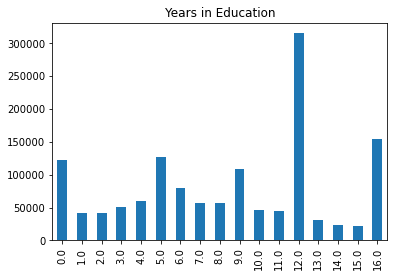

In [6]:
pnad.years_in_education.replace('Sem instrução e menos de 1 ano de estudo', '0', inplace=True)
pnad.years_in_education.replace(regex = r' a.*', value='', inplace=True)
pnad.years_in_education = pd.to_numeric(pnad.years_in_education)
pnad.years_in_education.value_counts().sort_index().plot(kind='bar', title='Years in Education')

<AxesSubplot:title={'center':'Literate'}>

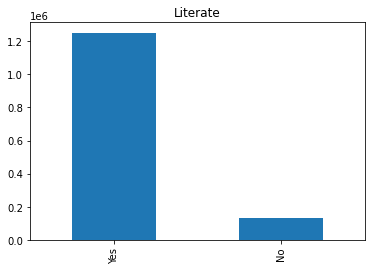

In [7]:
pnad.literate.replace('Sim', 'Yes', inplace=True)
pnad.literate.replace('Não', 'No', inplace=True)
pnad.literate.value_counts().plot(kind='bar', title='Literate')

<AxesSubplot:title={'center':'Sex'}>

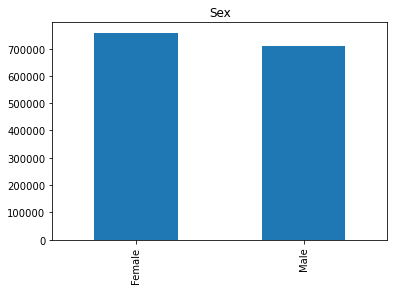

In [8]:
pnad.sex.replace('Homem', 'Male', inplace=True)
pnad.sex.replace('Mulher', 'Female', inplace=True)
pnad.sex.value_counts().plot(kind='bar', title='Sex')

<AxesSubplot:title={'center':'Skin Color'}>

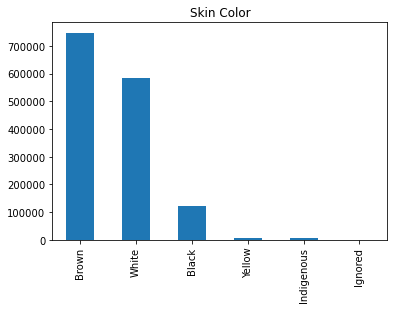

In [9]:
pnad.skin_color.replace('Parda', 'Brown', inplace=True)
pnad.skin_color.replace('Branca', 'White', inplace=True)
pnad.skin_color.replace('Preta', 'Black', inplace=True)
pnad.skin_color.replace('Amarela', 'Yellow', inplace=True)
pnad.skin_color.replace('Indígena', 'Indigenous', inplace=True)
pnad.skin_color.replace('Ignorado', 'Ignored', inplace=True)
pnad.skin_color.value_counts().plot(kind='bar', title='Skin Color')

In [10]:
pnad.to_csv('pnad_clean.csv', index=False)

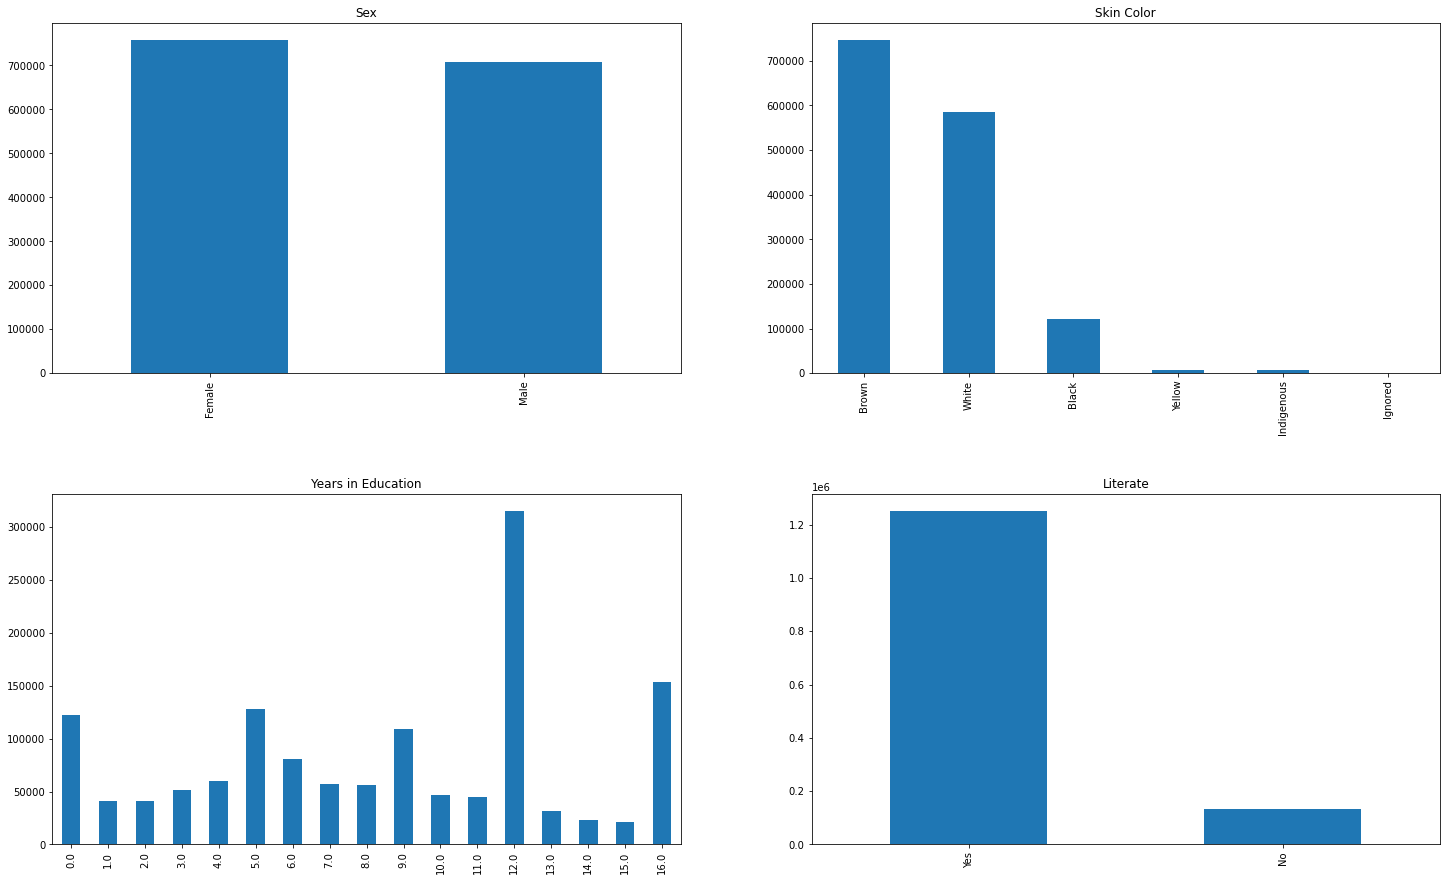

In [11]:
fig, ax = plt.subplots(2,2, figsize=(20,12))
fig.tight_layout(h_pad=10, w_pad=10)
pnad.sex.value_counts().plot(kind='bar', title='Sex', ax=ax[0][0])
pnad.skin_color.value_counts().plot(kind='bar', title='Skin Color', ax=ax[0][1])
pnad.years_in_education.value_counts().sort_index().plot(kind='bar', title='Years in Education', ax=ax[1][0])
pnad.literate.value_counts().plot(kind='bar', title='Literate', ax=ax[1][1])
plt.savefig('var_distribution.png')
plt.show()

<AxesSubplot:title={'center':'Missing Values'}>

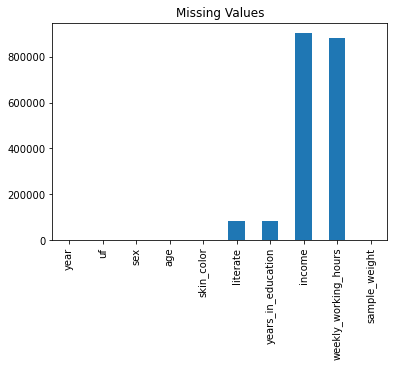

In [16]:
pnad.isna().sum().plot(kind='bar', title='Missing Values')

In [13]:
pnad = pd.read_csv("pnad_clean.csv")
pnad

,year,uf,sex,age,skin_color,literate,years_in_education,income,weekly_working_hours,sample_weight
0,2021,Rondônia,Female,39,Brown,Yes,5.0,1045.0,40.0,107.066353
1,2021,Rondônia,Female,20,Brown,Yes,10.0,1045.0,40.0,107.066353
2,2021,Rondônia,Female,16,Brown,Yes,10.0,NaN,NaN,107.066353
3,2021,Rondônia,Male,73,Brown,Yes,12.0,NaN,NaN,107.066353
4,2021,Rondônia,Female,59,Brown,Yes,12.0,NaN,NaN,107.066353
...,...,...,...,...,...,...,...,...,...,...
1466390,2021,Distrito Federal,Male,32,Brown,Yes,13.0,1000.0,40.0,39.647165
1466391,2021,Distrito Federal,Male,6,Brown,No,0.0,NaN,NaN,39.647165
1466392,2021,Distrito Federal,Male,3,Brown,NaN,NaN,NaN,NaN,39.647165
1466393,2021,Distrito Federal,Female,18,Brown,Yes,11.0,NaN,NaN,39.647165
